# Simple Linear Regression

#### World War Climate data, find corelation between min temp and max temp of a day

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Summary of Weather.csv')
df_loc = pd.read_csv('Weather Station Locations.csv') 

In [3]:
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_loc.head()

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333


In [5]:
df_loc.describe()

,WBAN,ELEV,Latitude,Longitude
count,161.000000,161.000000,161.000000,161.000000
mean,33421.440994,439.850932,20.347205,8.364182
std,20826.534394,1745.422339,21.042992,87.420419
min,10001.000000,1.000000,-27.600000,-175.000000
25%,13601.000000,9.000000,8.233333,-60.850000
50%,32906.000000,27.000000,22.333333,9.083333
75%,34150.000000,98.000000,36.116667,67.250000
max,82506.000000,9999.000000,67.016667,177.366667


In [6]:
df_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WBAN              161 non-null    int64  
 1   NAME              161 non-null    object 
 2   STATE/COUNTRY ID  161 non-null    object 
 3   LAT               161 non-null    object 
 4   LON               161 non-null    object 
 5   ELEV              161 non-null    int64  
 6   Latitude          161 non-null    float64
 7   Longitude         161 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 10.2+ KB


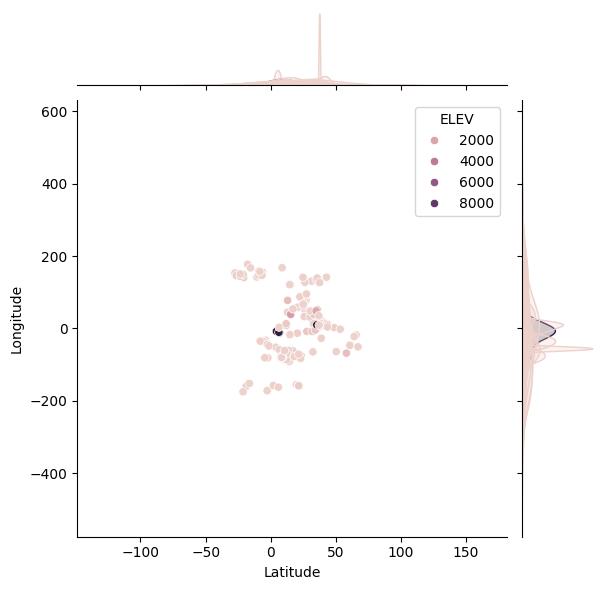

In [7]:
sns.jointplot(data=df_loc, x="Latitude", y="Longitude", hue="ELEV")

In [8]:
#this is all we can do with df_loc

In [9]:
df.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

In [11]:
df.drop(df.iloc[:, 7:], inplace=True, axis=1)

In [12]:
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444


In [13]:
df.drop(df.columns[[0, 1, 3]], axis=1, inplace=True)

In [14]:
df.head()

,Precip,MaxTemp,MinTemp,MeanTemp
0,1.016,25.555556,22.222222,23.888889
1,0,28.888889,21.666667,25.555556
2,2.54,26.111111,22.222222,24.444444
3,2.54,26.666667,22.222222,24.444444
4,0,26.666667,21.666667,24.444444


## EDA

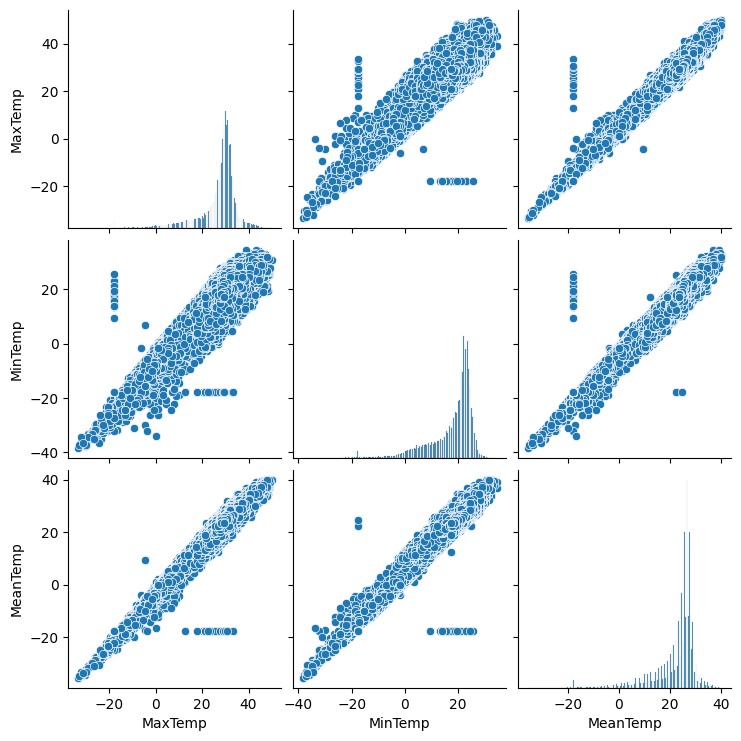

In [15]:
sns.pairplot(df)

In [16]:
#now we can create a model for min and max temp

In [17]:
X = df[['MinTemp']]

y = df[['MaxTemp']]

In [18]:
print(X.head())
print('\n')
print(y.head())

     MinTemp
0  22.222222
1  21.666667
2  22.222222
3  22.222222
4  21.666667


     MaxTemp
0  25.555556
1  28.888889
2  26.111111
3  26.666667
4  26.666667


In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   MinTemp  119040 non-null  float64
dtypes: float64(1)
memory usage: 930.1 KB


In [20]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   MaxTemp  119040 non-null  float64
dtypes: float64(1)
memory usage: 930.1 KB


In [21]:
#since there are no null values we can create our model


<Axes: xlabel='MinTemp', ylabel='Density'>

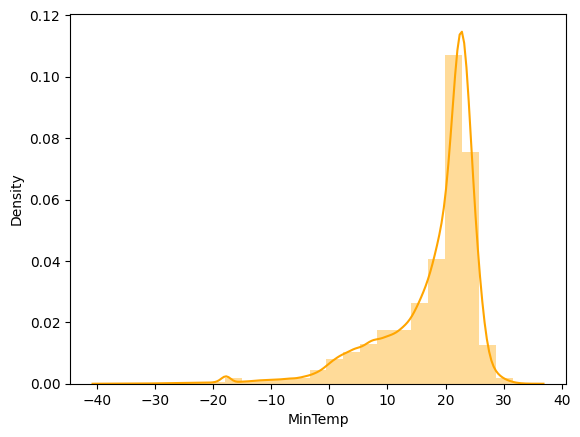

In [22]:
sns.distplot( df['MinTemp'], bins = 25, kde= True, color='orange')

<Axes: xlabel='MinTemp', ylabel='count'>

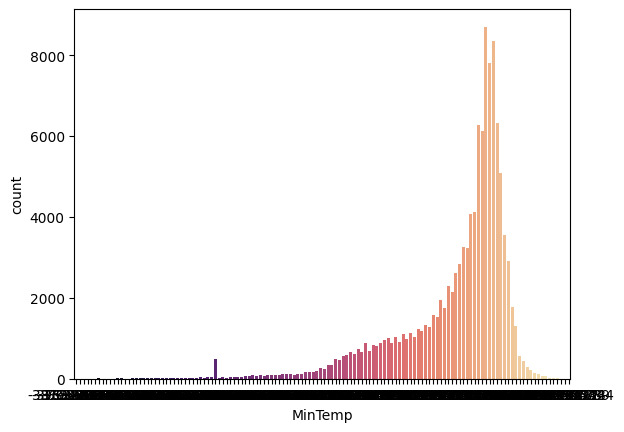

In [23]:
sns.countplot( x = 'MinTemp', data = df, palette = 'magma')

<Axes: xlabel='MaxTemp', ylabel='Density'>

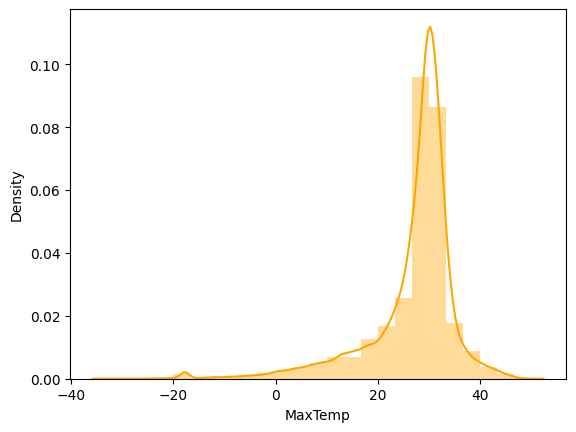

In [24]:
sns.distplot( df['MaxTemp'], bins = 25, kde= True, color='orange')

<Axes: xlabel='MaxTemp', ylabel='count'>

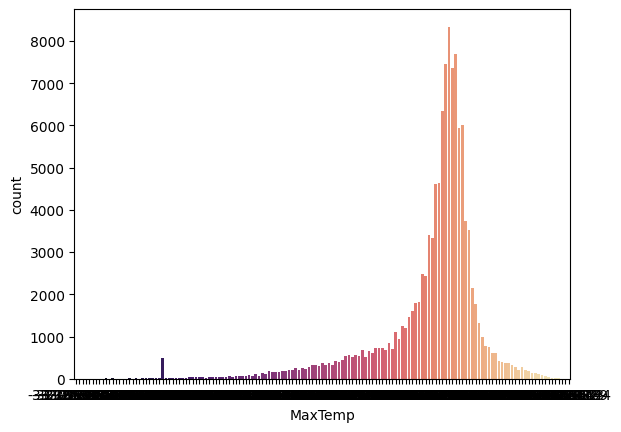

In [25]:
sns.countplot( x = 'MaxTemp', data = df, palette = 'magma')

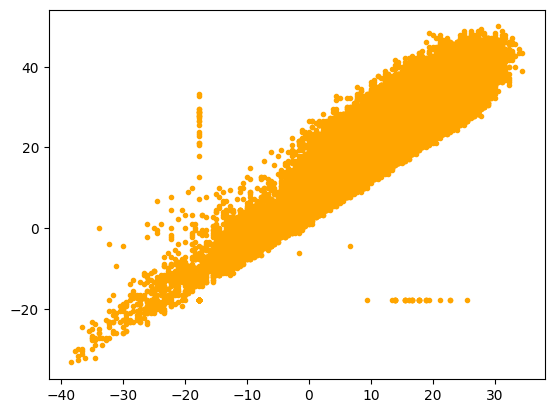

In [26]:
plt.scatter(X, y, color = 'orange', marker = '.')

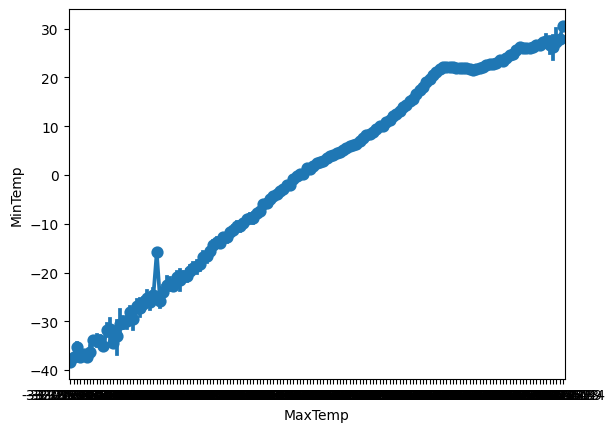

In [27]:
sns.pointplot(x="MaxTemp", y="MinTemp", data=df)
plt.show()

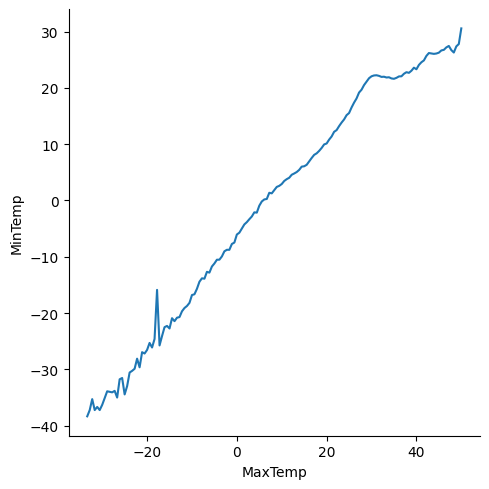

In [28]:
sns.relplot(data=df, x="MaxTemp", y="MinTemp",kind="line",ci=None)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)


In [30]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [31]:
#plotting the regression line

print(regr.coef_)
print(regr.intercept_)

[[0.9199768]]
[10.66173469]


In [32]:
print('%fx + %f' %(regr.coef_, regr.intercept_))

0.919977x + 10.661735


Text(0, 0.5, 'Predicted Y')

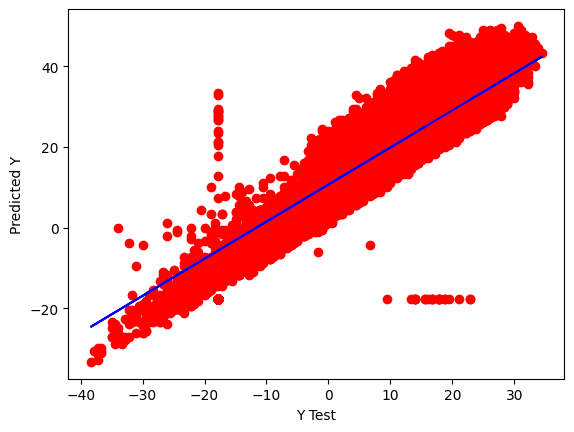

In [33]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regr.predict(X_train), color = 'blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [34]:
# evaluation


In [36]:
from sklearn import metrics

yhat = regr.predict(X_test)

In [38]:
print('MAE is %f' % metrics.mean_absolute_error(y_test, yhat))
print('MSE is %f' % metrics.mean_squared_error(y_test, yhat))
print('RMSE is %f' % np.sqrt(metrics.mean_squared_error(y_test, yhat)))
print('R2SCORE is %f' % metrics.r2_score(y_test, yhat))

MAE is 3.201341
MSE is 17.538535
RMSE is 4.187903
R2SCORE is 0.770190


Text(0, 0.5, 'y pred')

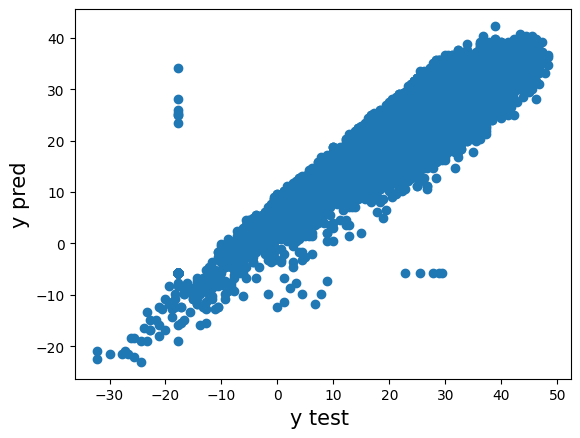

In [41]:
residual = y_test - yhat
plt.scatter(y_test, yhat)
plt.xlabel('y test ', fontsize=15)
plt.ylabel('y pred', fontsize=15)

Text(0, 0.5, 'residual')

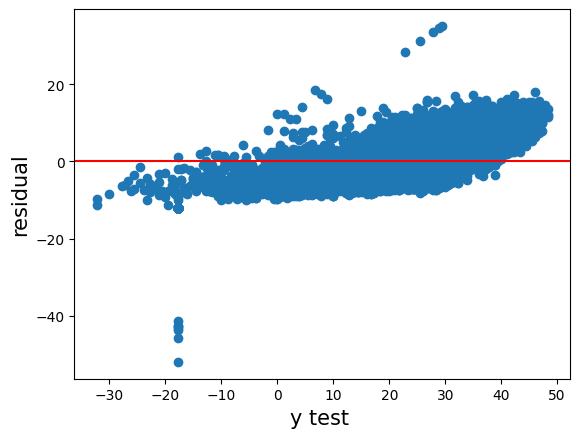

In [43]:
plt.scatter(y_test, residual)
plt.axhline(color='r')
plt.xlabel('y test ', fontsize=15)
plt.ylabel('residual', fontsize=15)

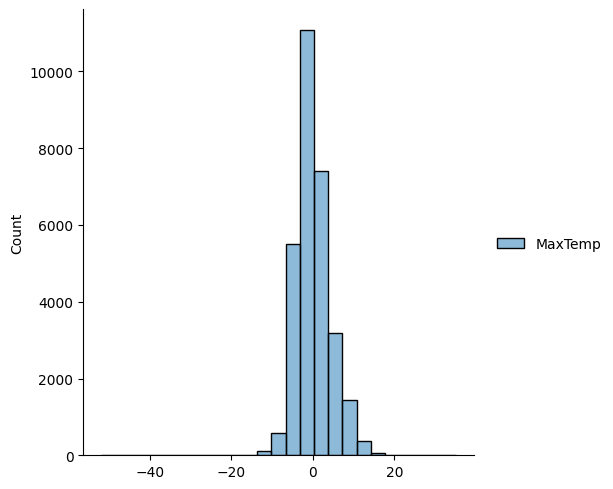

In [44]:
sns.displot(data=residual, bins=25)